In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [3]:
def naive(p, q):
    ''' fill your code in here...
    '''

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [4]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [5]:
rows.ravel()

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3])

In [6]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [28]:
def with_indices(p, q):
    ''' fill your code in here...
    '''
    rows_, cols_ = np.indices((p.shape[0], q.shape[0]))
    diff = p[rows_.ravel()] - q[cols_.ravel()]
    print(diff.shape)
    sq = np.square(diff)
    print(sq.shape)
    summ = np.sum(sq, axis=1)
    print(summ.shape)
    final = np.sqrt(summ).reshape((p.shape[0], q.shape[0]))
    print(final.shape)
    return final

In [29]:
D = with_indices(p, q)
print(D)

(20, 2)
(20, 2)
(20,)
(4, 5)
[[0.60599073 0.93659449 0.91124856 0.59321356 0.27561751]
 [0.80746999 0.21102354 0.67268649 0.22495084 0.46534491]
 [0.35654215 0.75217493 0.57200052 0.49900068 0.23310825]
 [0.67281411 0.52407472 0.31520226 0.63212897 0.70277376]]


### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [8]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [9]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

### Scikit 

In [11]:
from sklearn.metrics.pairwise import euclidean_distances

def scikit_(p, q):
    return euclidean_distances(p, q)

# Compare methods

In [14]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting, scikit_]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

379 ns ± 25.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
37.2 ms ± 760 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
2.36 ms ± 6.18 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
19.2 ms ± 1.18 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.46 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


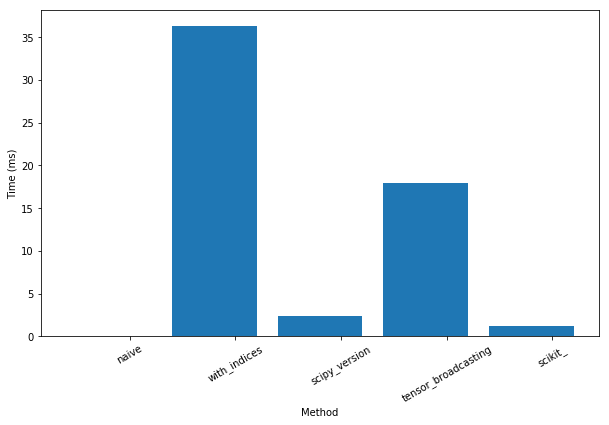

In [15]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()